# Big Mart Sales

## Data Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


## Importing the train dataset

In [2]:
tr_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
tr_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Dimension of the dataset

In [3]:
tr_df.shape 

(8523, 12)

In [4]:
tr_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Column information

In [5]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Statistical summary of Train set
tr_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# Checking the null values in the  Train dataset
tr_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### There are 1463 NaN values in the column 'Item_Weight' and 2410 NaN values in the column 'Outlet_Size'.

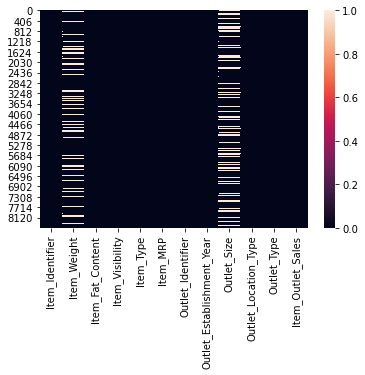

In [8]:
sns.heatmap(tr_df.isnull())

#### From this plot it is clear that the two columns in the dataset item_weight and outlet_size contains NaN values

Now we are going to check the value counts of the columns 'Item_Weight'  and 'Outlet_Size'

In [9]:
print('Item_Weight:',tr_df['Item_Weight'].value_counts(),'\n\n')
print('Outlet_Size:',tr_df['Outlet_Size'].value_counts(),'\n\n')

Item_Weight: 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64 


Outlet_Size: Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 




Here the column Item_Weight is numerical and column Outlet_Size is categorical.so while replacing NaN values,in categorical columns NaN values are replaced by Mode and in numeric columns categorical values are replaced by median or mean values

In [10]:
#The NaN values are replacing by SimpleImputer method
from sklearn.impute import SimpleImputer

In [11]:
imp=SimpleImputer(strategy='most_frequent')
tr_df['Outlet_Size']=imp.fit_transform(tr_df['Outlet_Size'].values.reshape(-1,1))

In [12]:
imp=SimpleImputer(strategy='median')
tr_df['Item_Weight']=imp.fit_transform(tr_df['Item_Weight'].values.reshape(-1,1))


In [13]:
tr_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

So we replaced all NaN values

In [14]:
Numerical_variables=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
Categorical_variables=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [15]:
tr_df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [16]:
tr_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We can See we have Repeating values with different names in the Item_Fat_Content column, we will correct them using the using the .replace() method

In [17]:
tr_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
tr_df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Visualization

### Univariate analysis of Numeric variables

In [19]:
var1=['Outlet_Establishment_Year']
def plotcountgraph(var1):
    plt.figure(figsize=(10,5))
    plt.xlabel(var1,fontsize=14)
    sns.countplot(tr_df[var1])

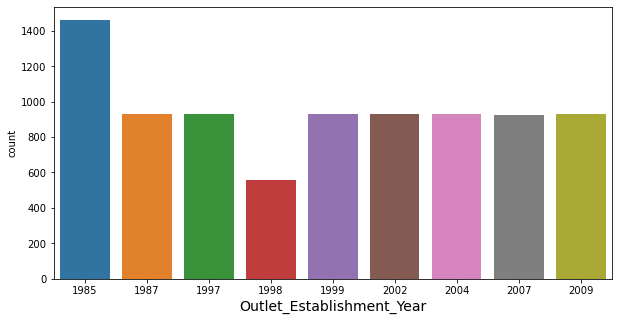

In [20]:
for i in var1:
    plotcountgraph(i)


## Univariate analysis of Categoric variables

In [21]:
var2=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
def plotcountgraph(var2):
    plt.figure(figsize=(12,8))
    plt.xlabel(var2,fontsize=14)
    sns.set(font_scale=1)
    plt.title('Value counts: \n{}'.format(tr_df[var2].value_counts(normalize = True)))
    sns.countplot(tr_df[var2])

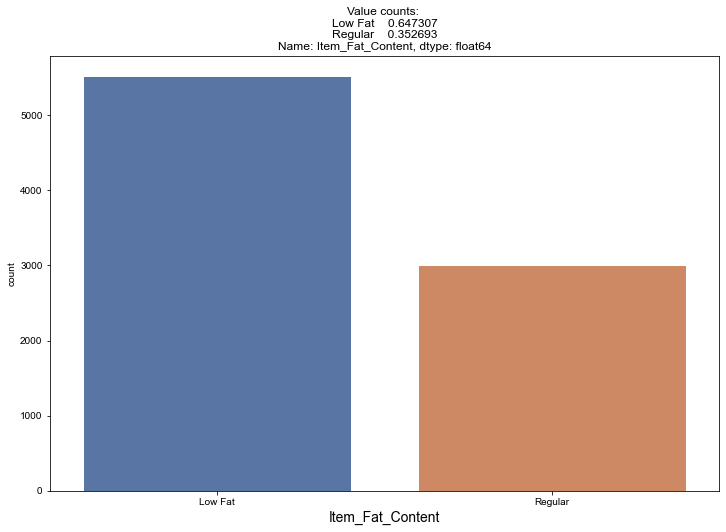

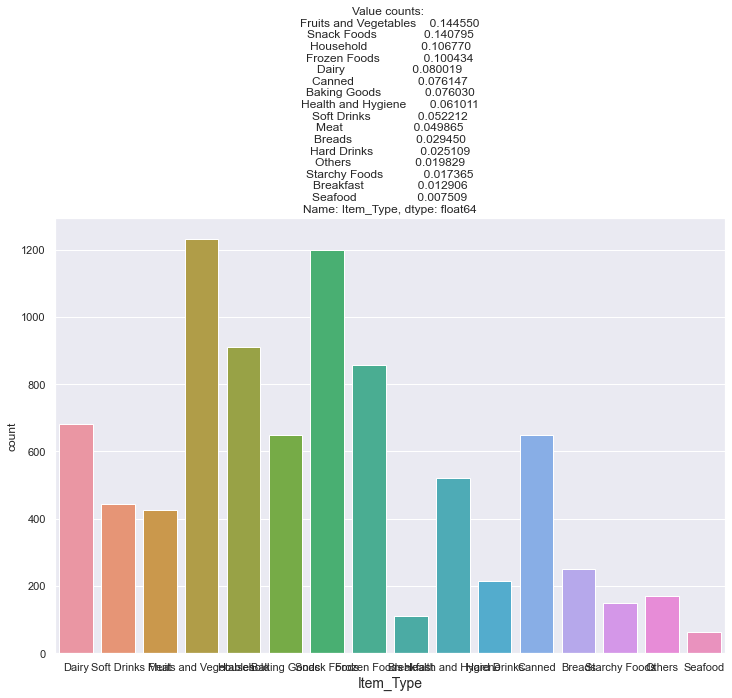

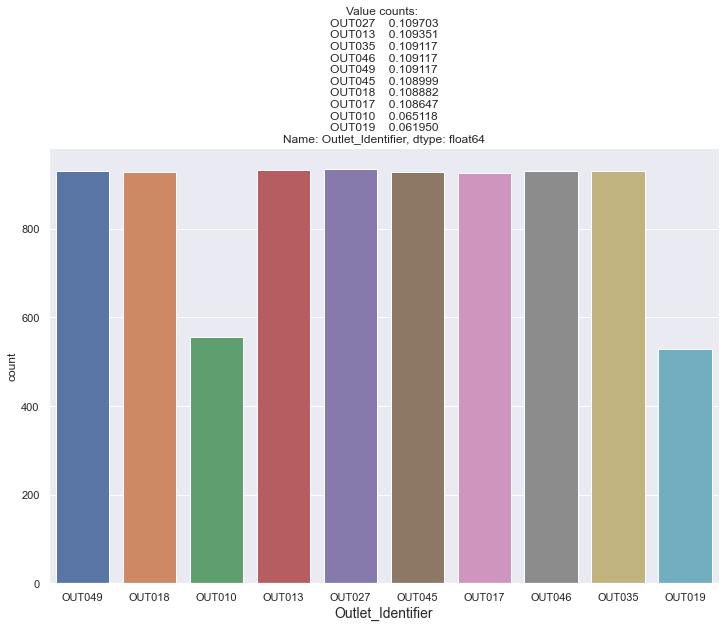

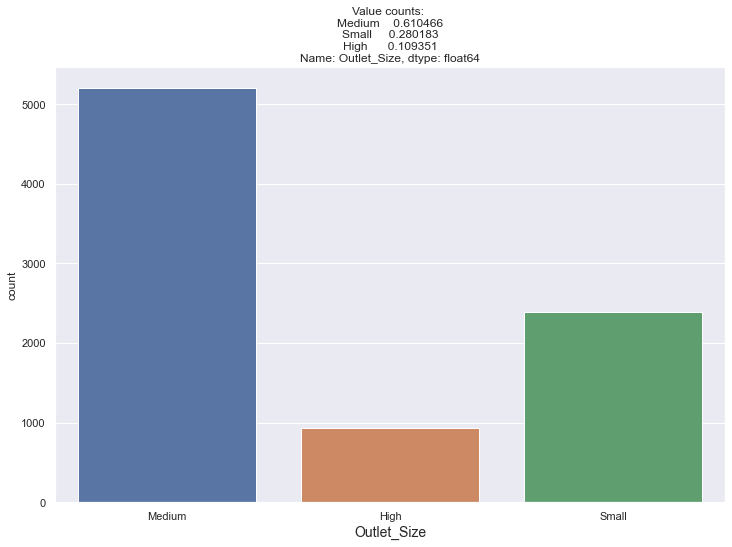

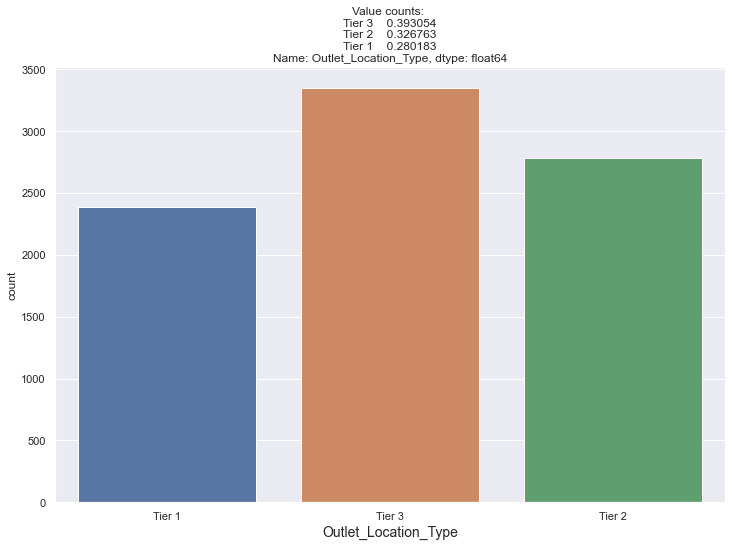

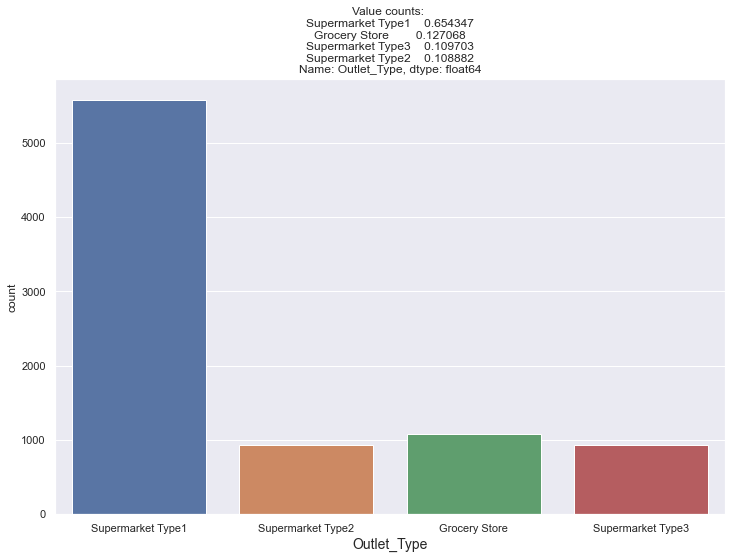

In [22]:
for m in var2:
    plotcountgraph(m)

### Observations from the graph

* Item_Fat_Content- Most of the people prefered low fatty items,since 64% of items sold out from the outlets are items with low fat.

* Outlet_Identifier- The outlets except Outlet019 and Outlet010 sold items in the same range,among which the outlet which sold maximum number of items is Outlet027

* Outlet_Size- 61% of the total number of items are sold from medium size store while only 10% items are sold from store which are very big.


* Outlet_Location_Type- Outlets in the location Tier 2 sold more compared to others(39%).

* Outlet_Type- Type1supermarket sold Majority of items(65%).The type of supermarket which sold less number of items are Type3 and Type2(10%)

* Item_Type- The type of item that sold out more in number is Fruits and Vegetables.and less in number is seafood items

## Bivariate Analysis

In [23]:
def plotbargraph(var):
    
    sns.set(font_scale=1)
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=var, y='Item_Outlet_Sales', data=tr_df)

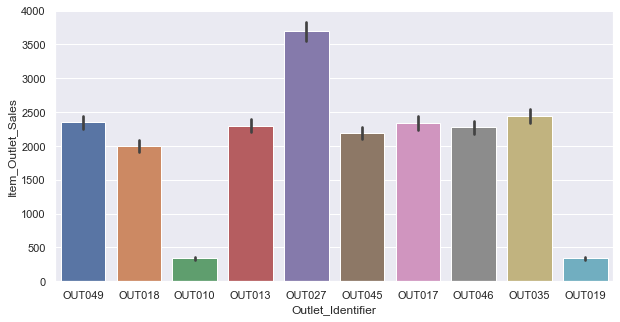

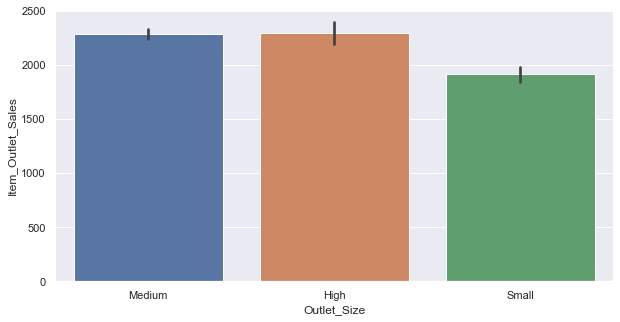

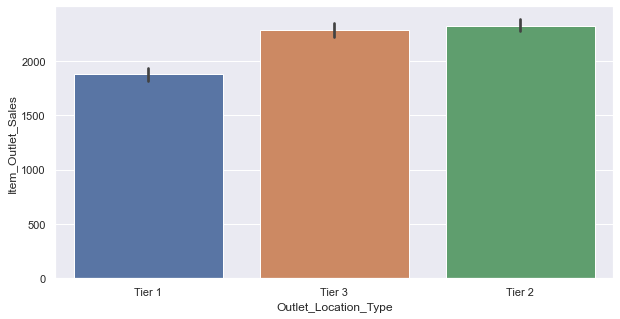

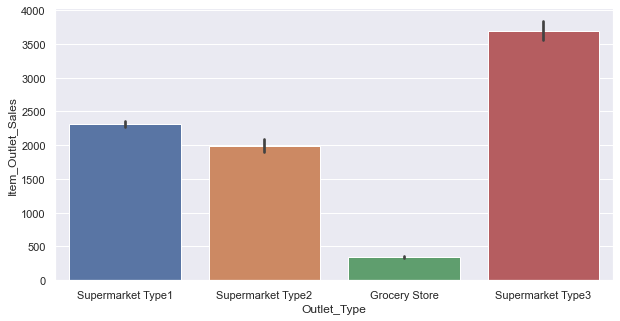

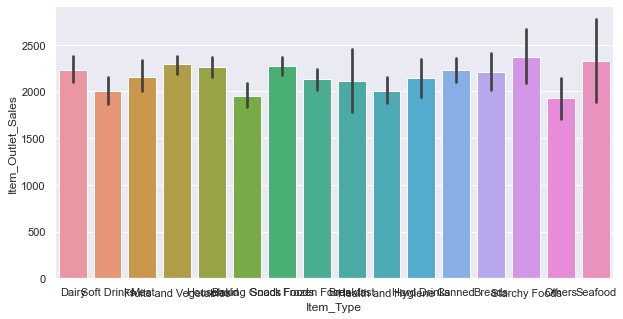

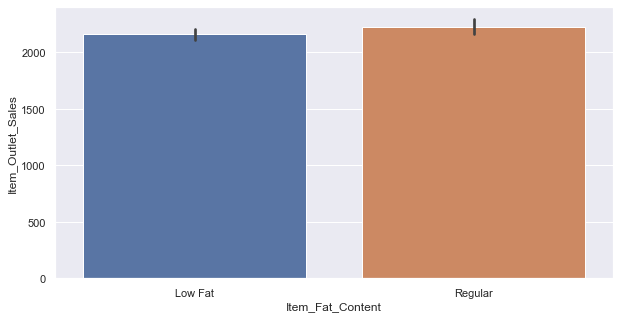

In [24]:
var=['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type','Item_Fat_Content']
for i in var:
    plotbargraph(i)

* From the first graph it is clear that the outlet which achieved maximum sales is OUT027.The outlet which earned minimum is OUT019 

* The outlets with medium in size earned maximum in sales. Small sizes outlets earned minimum in sales.

* The outlets in the area Tier 2 earned maximum in sales.

* The type of outlet that earned maximum ithrough sales is Supermarket Type3.

* The item_outlet_sales is maximum for  the item_type 'starchy food'.

* Outlets earned maximum by selling regular items.

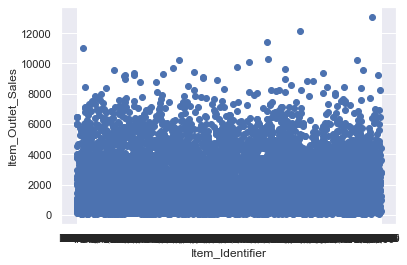

In [25]:
plt.scatter(tr_df['Item_Identifier'],tr_df['Item_Outlet_Sales'])
plt.xlabel('Item_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.show()

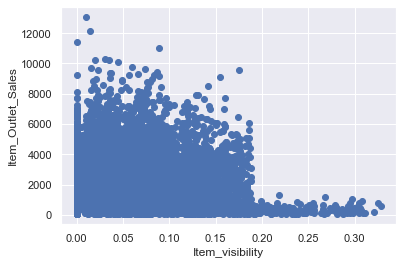

In [26]:
plt.scatter(tr_df['Item_Visibility'],tr_df['Item_Outlet_Sales'])
plt.xlabel('Item_visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

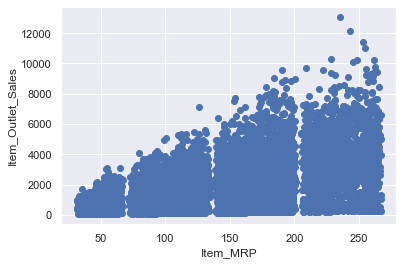

In [27]:
plt.scatter(tr_df['Item_MRP'],tr_df['Item_Outlet_Sales'])
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

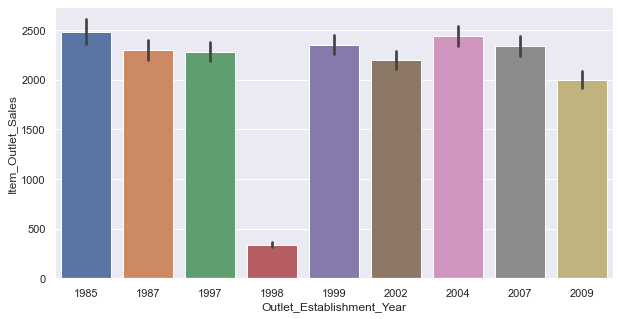

In [28]:
sns.set(font_scale=1)
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=tr_df)
plt.show()

* Item_Weight - The data is very spreaded, no specific pattern.

* Item_Visibility- The data is spreaded

* Item_MRP - Items with higher MRP tend to sell better in most cases.

* Outlet_Establishment_Year - Sales from the outlet that are too old is higher

### Multivariate Analysis

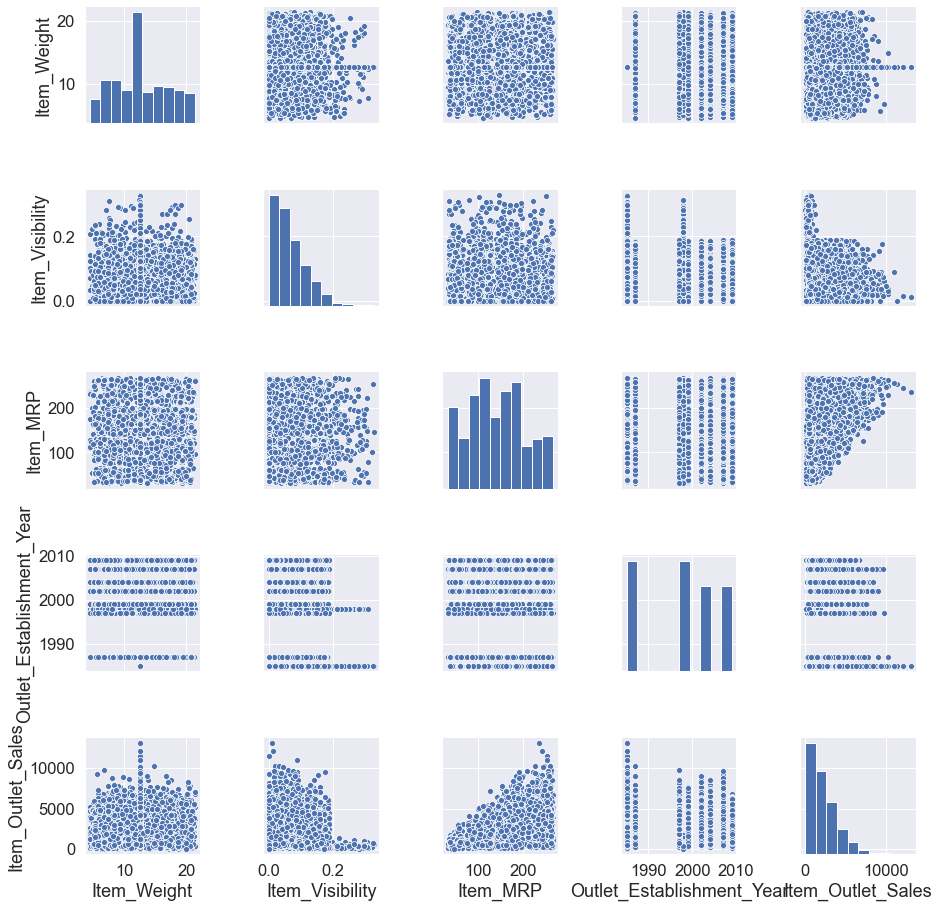

In [29]:
sns.set(font_scale=1.5)
sns.pairplot(tr_df)

## Checking Correlation

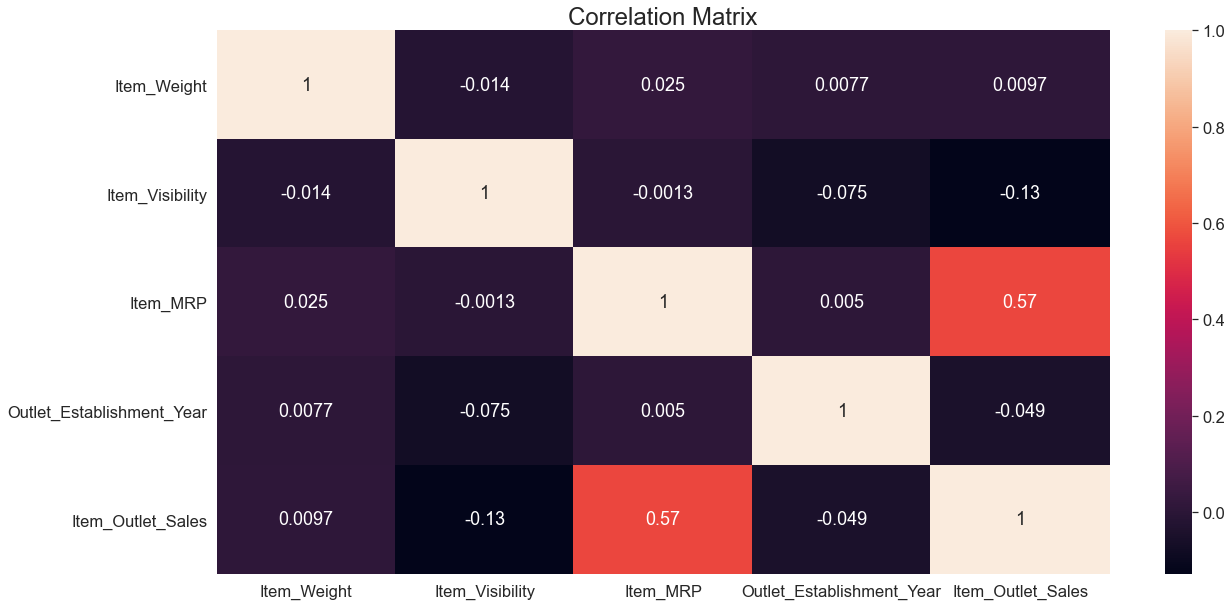

In [30]:
corr_mat=tr_df.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr_mat,annot=True)
sns.set(font_scale=2)

plt.title('Correlation Matrix')
plt.show()

### Observation

* Item_MRP is have strong correlation with Item_Outlet_Sales.

* Item_Weight have lowest correlation with target variable.so item weight have no influence on sales.

In [31]:
tr_df.drop('Item_Identifier',axis=1,inplace=True) # not so important fot further analysis

In [32]:
tr_df.drop('Outlet_Identifier',axis=1,inplace=True)

In [33]:
tr_df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

### Changing categorical columns to numerical

In [34]:
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Item_Type','Outlet_Type']

for i in Label:
    tr_df[i] = le.fit_transform(tr_df[i])

In [35]:
tr_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,2778.3834
8519,8.380,1,0.046982,0,108.1570,1,1,1,549.2850
8520,10.600,0,0.035186,8,85.1224,2,1,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,1,2,2,1845.5976


In [36]:
#Seperating independent and target variable in x and y
x=tr_df.iloc[:,0:8]
y=tr_df.iloc[:,-1]

### Checking Skewness

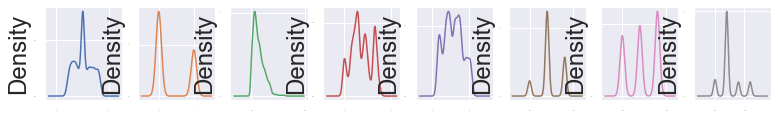

In [37]:
x.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

In [38]:
x.skew()

Item_Weight             0.121845
Item_Fat_Content        0.616705
Item_Visibility         1.167091
Item_Type               0.101655
Item_MRP                0.127202
Outlet_Size            -0.087072
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
dtype: float64

* Skewnwss is present in the columns Item_Visibility

## Removing Skewness

To remove the skewness we are going to use power_transform function.

In [39]:
from sklearn.preprocessing import power_transform
tr_df_new=power_transform(x)
tr_df_new=pd.DataFrame(tr_df_new,columns=x.columns)

In [40]:
tr_df_new.skew()

Item_Weight            -0.062510
Item_Fat_Content        0.616705
Item_Visibility         0.124279
Item_Type              -0.164574
Item_MRP               -0.115386
Outlet_Size            -0.042980
Outlet_Location_Type   -0.220632
Outlet_Type             0.007863
dtype: float64

## Checking Outliers

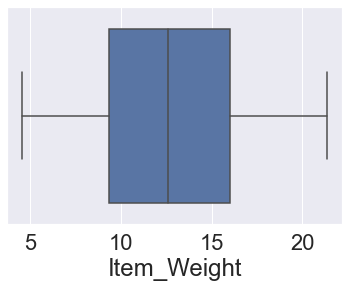

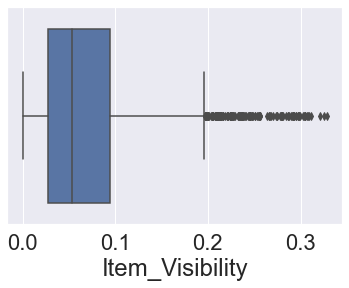

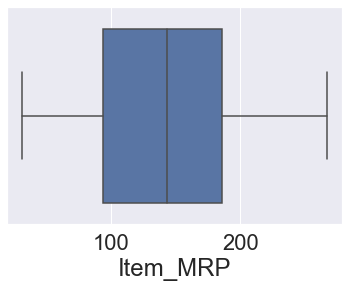

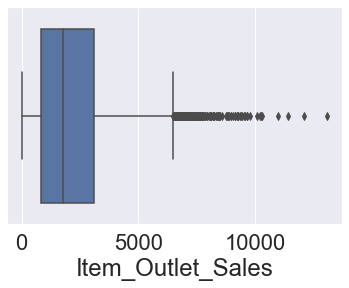

In [41]:
list=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
for i in list:
    
    sns.boxplot(tr_df[i])
    plt.show()

* There are no considerable outliers in the dataset

## Scaling the data using MinMaxScaler

In [42]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
x=mms.fit_transform(x)


In [43]:
x

array([[0.28252456, 0.        , 0.04886645, ..., 0.5       , 0.        ,
        0.33333333],
       [0.08127419, 1.        , 0.05870508, ..., 0.5       , 1.        ,
        0.66666667],
       [0.77076511, 0.        , 0.05103696, ..., 0.5       , 0.        ,
        0.33333333],
       ...,
       [0.35992855, 0.        , 0.10714751, ..., 1.        , 0.5       ,
        0.33333333],
       [0.15808276, 1.        , 0.44221878, ..., 0.5       , 1.        ,
        0.66666667],
       [0.61000298, 0.        , 0.13666114, ..., 1.        , 0.        ,
        0.33333333]])

In [44]:
x.shape

(8523, 8)

## Best Random state

In [45]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    rsc=r2_score(y_test,pred_test)
    if rsc>maxAccu:
        maxAccu=rsc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.5351989782102207 on Random_state 247


## Train-test-split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=247)

In [47]:
x_train.shape

(5966, 8)

In [48]:
x_test.shape

(2557, 8)

In [49]:
y_train.shape

(5966,)

In [50]:
y_test.shape

(2557,)

In [51]:
lr=LinearRegression()

In [52]:
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
pred_y=lr.predict(x_test)

In [54]:
lr.coef_

array([  26.15665334,   88.45549963, -557.73500875,    5.66201106,
       3656.68768701, -705.22147391, -828.12916155, 2923.23811533])

In [55]:
lr.intercept_

258.3665410282897

In [56]:
print('accuracy_score:',r2_score(y_test,pred_y))

accuracy_score: 0.5351989782102207


In [57]:
print('mse:',mean_squared_error(y_test,pred_y))
print('mae:',mean_absolute_error(y_test,pred_y))

mse: 1348463.381384628
mae: 878.554182802408


## Cross Validation

In [58]:
score=cross_val_score(lr,x,y,cv=5)
print('Score:',score)

print('Cross validation score',score.mean())
print('Standard deviation',score.std())


Score: [0.52553369 0.5043126  0.4899621  0.50582142 0.50457987]
Cross validation score 0.5060419377368305
Standard deviation 0.011346069596038953


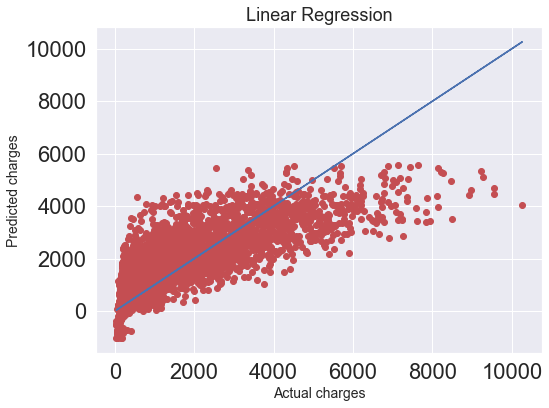

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_y,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

### Fitting non linear models

In [60]:
model=[DecisionTreeRegressor(),SVR(),RandomForestRegressor(),GradientBoostingRegressor(),KNeighborsRegressor()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(r2_score(y_test,predm))
    print('mse:',mean_squared_error(y_test,predm))
    print('mae:',mean_absolute_error(y_test,predm))
    print('\n')

Accuracy score of DecisionTreeRegressor() is:
0.1812813763444182
mse: 2375235.922257714
mae: 1073.9327961673837


Accuracy score of SVR() is:
0.026715032083837964
mse: 2823658.032921985
mae: 1258.8919731354474


Accuracy score of RandomForestRegressor() is:
0.5593891423424147
mse: 1278283.7798072873
mae: 795.3242424794681


Accuracy score of GradientBoostingRegressor() is:
0.6126331762796444
mse: 1123814.17523308
mae: 751.591679525936


Accuracy score of KNeighborsRegressor() is:
0.5314708842104989
mse: 1359279.1885909603
mae: 822.8651102542042




## Cross validation of models

In [61]:
model=[DecisionTreeRegressor(),SVR(),RandomForestRegressor(),GradientBoostingRegressor(),KNeighborsRegressor()]

for m in model:
    
    score=cross_val_score(m,x,y,cv=5)
    print('Cross validation score of',m,'is:')
    print('Score:',score)

    print('Cross validation score',score.mean())
    print('Standard deviation',score.std())
    print('\n')

Cross validation score of DecisionTreeRegressor() is:
Score: [0.20039033 0.13030677 0.18508326 0.21060555 0.2274343 ]
Cross validation score 0.1907640419375608
Standard deviation 0.033221714013946094


Cross validation score of SVR() is:
Score: [0.03823998 0.05516497 0.03661256 0.04900398 0.05131546]
Cross validation score 0.04606739004463598
Standard deviation 0.0073429391901166105


Cross validation score of RandomForestRegressor() is:
Score: [0.56187858 0.5314635  0.52117259 0.5518912  0.56178385]
Cross validation score 0.5456379428222702
Standard deviation 0.016510724242153996


Cross validation score of GradientBoostingRegressor() is:
Score: [0.609021   0.58112413 0.57265426 0.60199734 0.60185806]
Cross validation score 0.5933309581729109
Standard deviation 0.013932175315197505


Cross validation score of KNeighborsRegressor() is:
Score: [0.51359323 0.48686473 0.48386278 0.52488547 0.54706637]
Cross validation score 0.5112545154475893
Standard deviation 0.023744180339007274




#### Difference between the cross validation score and r2 score is minimum for RandomForestRegressor(1.65).so this is our best model.

## Regularization

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':range(0,10)}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)  

{'alpha': 0.1, 'random_state': 0}


In [64]:
ls=Lasso(alpha=.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5351990000244508

In [65]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
print('cross validation score',cv_mean)

cross validation score 0.5060419448559987


## Hyper parameter Tuning

In [66]:
#Creating parameter list to pass in GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[1,10],'n_estimators':[1,100]}

In [67]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [68]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

In [69]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 100}

In [70]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [71]:
r2_score(y_test,GCV_pred)

0.6045250436391713

In [72]:
#Saving Model
import pickle
filename="BigMartsales.pkl"
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

## Using theTest dataset

In [73]:
#loading the test data
te_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
te_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [74]:
#Dimension of the dataset
te_df.shape

(5681, 11)

In [75]:
te_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [76]:
# Statistical summary of Test set
te_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [77]:
# Checking the null values in the Test dataset
te_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### There are 976 NaN values in the column 'Item_Weight' and 1606 NaN values in the column 'Outlet_Size'.

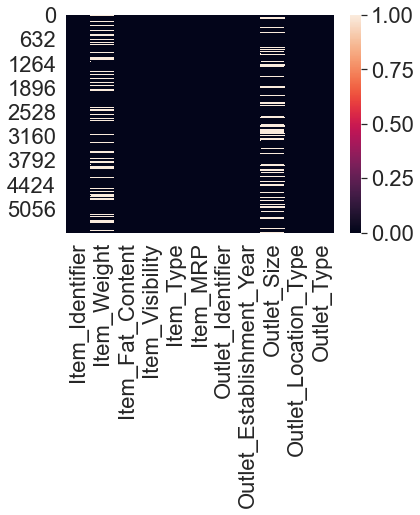

In [78]:
sns.heatmap(te_df.isnull())
plt.show()

Now we are going to check the value counts of the columns 'Item_Weight'  and 'Outlet_Size'

In [79]:
print('Item_Weight:',te_df['Item_Weight'].value_counts(),'\n\n')
print('Outlet_Size:',te_df['Outlet_Size'].value_counts(),'\n\n')

Item_Weight: 10.50    57
17.60    53
15.60    48
20.25    47
19.35    46
         ..
7.67      1
6.32      1
8.06      1
6.96      1
5.15      1
Name: Item_Weight, Length: 410, dtype: int64 


Outlet_Size: Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64 




Here the column Item_Weight is numerical and column Outlet_Size is categorical.so while replacing NaN values,in categorical columns NaN values are replaced by Mode and in numeric columns categorical values are replaced by median or mean values

In [80]:
#Nan values are removed by simple imputer method
imp=SimpleImputer(strategy='most_frequent')
te_df['Outlet_Size']=imp.fit_transform(te_df['Outlet_Size'].values.reshape(-1,1))

In [81]:
imp=SimpleImputer(strategy='median')
te_df['Item_Weight']=imp.fit_transform(te_df['Item_Weight'].values.reshape(-1,1))

In [82]:
te_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

so all NaN values are removed

In [83]:
Numerical_variables=['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']
Categorical_variables=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [84]:
print('Test_set:',te_df['Outlet_Size'].value_counts())

Test_set: Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [85]:
print('Test_Set:',te_df['Item_Fat_Content'].value_counts())

Test_Set: Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64


In [86]:

te_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
te_df.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [87]:
te_df.drop('Item_Identifier',axis=1,inplace=True) # not so important fot further analysis

In [88]:
te_df.drop('Outlet_Identifier',axis=1,inplace=True) # not so important fot further analysis

### Changing categorical columns to numerical

In [89]:
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Item_Type','Outlet_Type']

for i in Label:
    te_df[i] = le.fit_transform(te_df[i])

## Distribution of data among columns

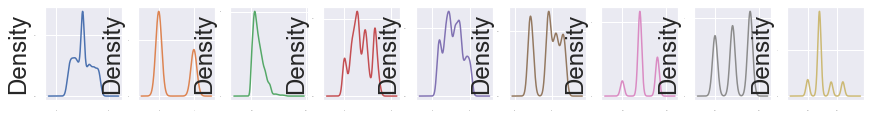

In [90]:
te_df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

In [91]:
#Checking skewness
te_df.skew()

Item_Weight                  0.166489
Item_Fat_Content             0.609223
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

We can see the skewness in the column Item_Visibility

### Removing Skewness

In [92]:
from sklearn.preprocessing import power_transform
te_df_new=power_transform(te_df)
te_df_new=pd.DataFrame(te_df_new,columns=te_df.columns)

### Checking Outliers

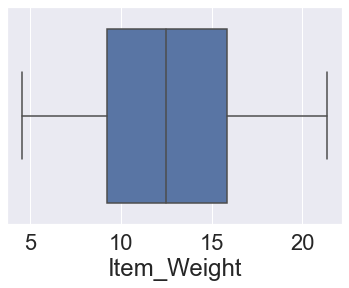

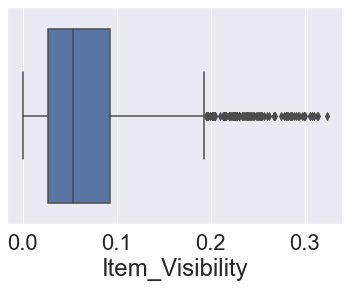

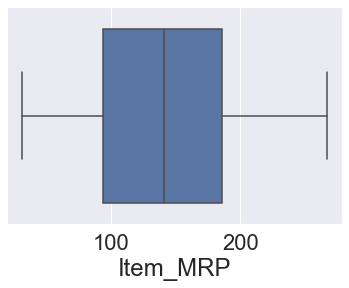

In [93]:
list=['Item_Weight','Item_Visibility','Item_MRP']
for i in list:
    
    sns.boxplot(te_df[i])
    plt.show()

* There are no considerable outliers in the dataset

In [94]:
te_df.drop('Outlet_Establishment_Year',axis=1,inplace=True) # drop this column since they are not very important for further analysis

In [95]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
te_df=mms.fit_transform(te_df)


In [96]:
#load the model
fitted_model=pickle.load(open('BigMartsales.pkl','rb'))

In [97]:
fitted_model

RandomForestRegressor(max_depth=10, max_features='log2')

In [98]:
#prediction over the test data
predictions=fitted_model.predict(te_df)

In [99]:
predictions

array([1740.6991476 , 1443.39123862,  746.47465404, ..., 1801.73008626,
       4066.89325867, 1390.21463201])